# **[Data4life] Trending YouTube Analysis**

## **Import packages**

In [310]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

pd.options.display.float_format = '{:,.2f}'.format

## **Load datasets**

In [2]:
us_videos = pd.read_csv(filepath_or_buffer='./youtube_data/USvideos.csv', encoding='ISO-8859-1')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
with open(file='./youtube_data/US_category_id.json', mode='r') as file:
    data = json.load(file)
    categories = {int(category['id']): (category['snippet']['title'], category['snippet']['assignable']) for category in data['items']}

categories

{1: ('Film & Animation', True),
 2: ('Autos & Vehicles', True),
 10: ('Music', True),
 15: ('Pets & Animals', True),
 17: ('Sports', True),
 18: ('Short Movies', False),
 19: ('Travel & Events', True),
 20: ('Gaming', True),
 21: ('Videoblogging', False),
 22: ('People & Blogs', True),
 23: ('Comedy', True),
 24: ('Entertainment', True),
 25: ('News & Politics', True),
 26: ('Howto & Style', True),
 27: ('Education', True),
 28: ('Science & Technology', True),
 29: ('Nonprofits & Activism', True),
 30: ('Movies', False),
 31: ('Anime/Animation', False),
 32: ('Action/Adventure', False),
 33: ('Classics', False),
 34: ('Comedy', False),
 35: ('Documentary', False),
 36: ('Drama', False),
 37: ('Family', False),
 38: ('Foreign', False),
 39: ('Horror', False),
 40: ('Sci-Fi/Fantasy', False),
 41: ('Thriller', False),
 42: ('Shorts', False),
 43: ('Shows', False),
 44: ('Trailers', False)}

## **Clean data**

In [4]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
us_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,"40,949.00","40,949.00","40,949.00","40,949.00","40,949.00"
mean,19.97,"2,360,784.64","74,266.70","3,711.40","8,446.80"
std,7.57,"7,394,113.76","228,885.34","29,029.71","37,430.49"
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,"242,329.00","5,424.00",202.00,614.00
50%,24.00,"681,861.00","18,091.00",631.00,"1,856.00"
75%,25.00,"1,823,157.00","55,417.00","1,938.00","5,755.00"
max,43.00,"225,211,923.00","5,613,827.00","1,674,420.00","1,361,580.00"


In [6]:
us_videos.duplicated().sum()

np.int64(48)

In [7]:
us_videos.drop_duplicates(inplace=True, ignore_index=True)
us_videos.duplicated().sum()

np.int64(0)

In [116]:
us_videos[['video_id', 'trending_date']].duplicated().sum()

np.int64(2)

In [117]:
us_videos.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True, ignore_index=True)
us_videos[['video_id', 'trending_date']].duplicated().sum()

np.int64(0)

In [8]:
us_videos['trending_date'] = pd.to_datetime(arg=us_videos['trending_date'], format='%y.%d.%m')
us_videos['publish_time'] = pd.to_datetime(arg=us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [9]:
us_videos.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

In [10]:
us_videos['category'] = us_videos['category_id'].map(categories).str[0]
us_videos['category'].head()

0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: category, dtype: object

## **General**

### **Question 1: What is the number of trending videos for each year?**

In [11]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().reset_index().rename(
    columns={'trending_date': 'year', 'video_id': 'trending_videos_count'}
)

,year,trending_videos_count
0,2017,2119
1,2018,4427


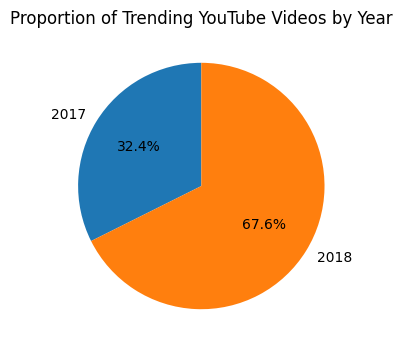

In [12]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().plot.pie(
    y='video_id', startangle=90, autopct='%1.1f%%', figsize=(5, 4)
)
plt.title(label='Proportion of Trending YouTube Videos by Year')
plt.ylabel(ylabel='')
plt.show()

The number of trending videos in 2017 was significantly less than in 2018. Now, let's check the start and last dates in this dataset.

In [13]:
us_videos['trending_date'].min(), us_videos['trending_date'].max()

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In 2017, there are just 2 months (November to December), while in 2018, there are 6 months (January to June). Thus, the difference in quantity is normal.

### **Question 2: How many videos have disabled comments?**

In [14]:
us_videos.groupby(by='comments_disabled')['video_id'].nunique()

comments_disabled
False    6251
True      107
Name: video_id, dtype: int64

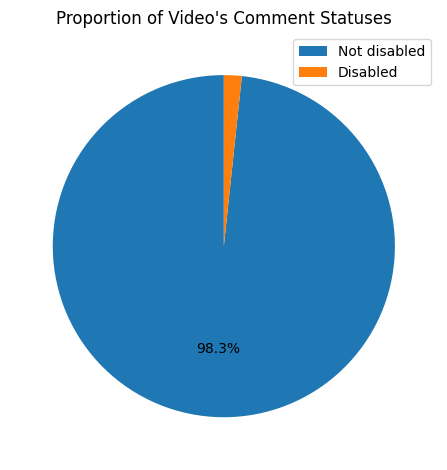

In [276]:
def autopct_func_90(pct):
    return f'{pct:.1f}%' if pct > 90 else ''

us_videos.groupby(by='comments_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Comment Statuses")
plt.ylabel(ylabel='')
plt.legend(['Not disabled', 'Disabled'])
plt.tight_layout()
plt.show()

### **Question 3: How many videos have disabled ratings?**

In [33]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique()

ratings_disabled
False    6327
True       32
Name: video_id, dtype: int64

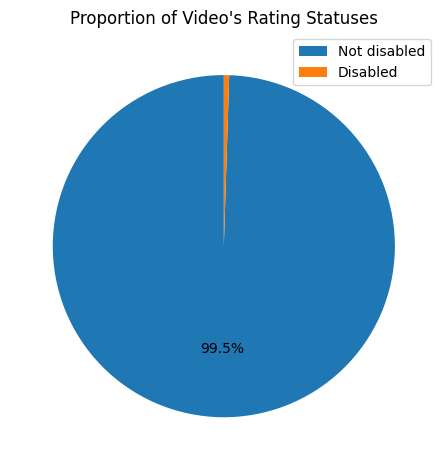

In [271]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Rating Statuses")
plt.ylabel(ylabel='')
plt.legend(['Not disabled', 'Disabled'])
plt.tight_layout()
plt.show()

### **Question 4: How many videos have errors or have been removed?**

In [38]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique()

video_error_or_removed
False    6348
True        4
Name: video_id, dtype: int64

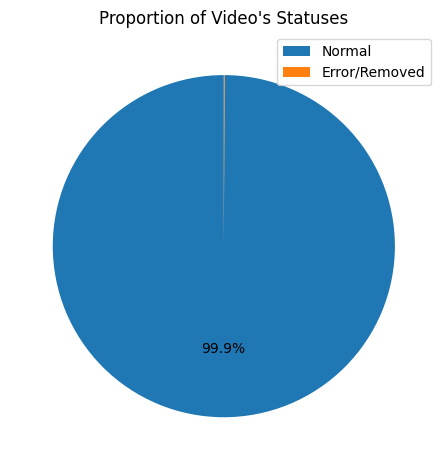

In [274]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Statuses")
plt.ylabel(ylabel='')
plt.legend(['Normal', 'Error/Removed'])
plt.tight_layout()
plt.show()

## **Videos**

### **Question 5: Which videos reach the YouTube Trending Board the quickest? Which channels do those videos belong to?**

In [111]:
trending_time = us_videos.groupby(by='video_id', as_index=False).agg(func={'publish_time': 'first', 'trending_date': 'max'})
# trending_time['days_to_trending'] = np.ceil((trending_time['trending_date'] - trending_time['publish_time']).dt.total_seconds() / (24 * 3600)).astype(int)
trending_time['days_to_trending'] = (trending_time['trending_date'].dt.date - trending_time['publish_time'].dt.date)
trending_time[trending_time['days_to_trending'] < pd.Timedelta(days=2)]

,video_id,publish_time,trending_date,days_to_trending
10,-39ysKKpE7I,2018-04-23 15:37:08,2018-04-24,"1 day, 0:00:00"
19,-8ZHXaGILlc,2018-02-19 11:26:50,2018-02-20,"1 day, 0:00:00"
21,-9rdDeWzvsU,2018-06-13 16:00:24,2018-06-14,"1 day, 0:00:00"
41,-QPdRfqTnt4,2018-06-13 07:00:00,2018-06-14,"1 day, 0:00:00"
44,-QxZv_wJ1aA,2017-12-13 07:00:00,2017-12-14,"1 day, 0:00:00"
...,...,...,...,...
6268,z05WIkCvgjU,2018-01-14 01:05:42,2018-01-15,"1 day, 0:00:00"
6276,z7BOWQihC7M,2018-06-08 11:42:37,2018-06-09,"1 day, 0:00:00"
6295,zJUtRGrvkqM,2017-12-01 16:42:00,2017-12-02,"1 day, 0:00:00"
6335,zkrq7Kpd1so,2018-03-24 07:55:21,2018-03-24,0:00:00


### **Question 6: Which videos remain on the YouTube Trending Board the longest? Which channels do those videos belong to?**

In [147]:
trending_duration = us_videos.groupby(by='video_id')['trending_date'].count().sort_values(ascending=False)
trending_duration

video_id
j4KvrAUjn6c    29
8h--kFui1JA    29
WIV3xNz8NoM    28
t4pRQ0jn23Q    28
QBL8IRJ5yHU    28
               ..
-8ZHXaGILlc     1
-9OfAHgdV8Y     1
-9rdDeWzvsU     1
zeQaJGkFyqQ     1
zkrq7Kpd1so     1
Name: trending_date, Length: 6351, dtype: int64

In [148]:
np.unique(ar=trending_duration.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [149]:
trending_duration = us_videos[us_videos['video_id'].isin(trending_duration[trending_duration >= 28].index)].drop_duplicates(subset='video_id', ignore_index=True)
trending_duration

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,8h--kFui1JA,2018-05-10,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09 17:00:00,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,1133,4357,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
1,WIV3xNz8NoM,2018-05-11,Cobra Kai Season 2,Cobra Kai,24,2018-05-10 17:02:55,"cobra kai season 2|""cobra kai new season""|""cob...",378105,19998,395,4483,https://i.ytimg.com/vi/WIV3xNz8NoM/default.jpg,False,False,False,"The first roundâs over, are you ready for th...",Entertainment
2,iILJvqrAQ_w,2018-05-12,Charlie Puth - BOY [Official Audio],Charlie Puth,10,2018-05-11 04:00:34,"charlie puth|""boy""|""charlie""|""puth""|""atlantic""...",981789,55917,616,3021,https://i.ytimg.com/vi/iILJvqrAQ_w/default.jpg,False,False,False,Voicenotes Available Now: https://Atlantic.lnk...,Music
3,ulNswX3If6U,2018-05-12,Selena Gomez - Back To You (Lyric Video),Selena Gomez,1,2018-05-10 16:00:11,"selena gomez|""13 reasons why""|""back to you""|""s...",3969429,409750,4750,25876,https://i.ytimg.com/vi/ulNswX3If6U/default.jpg,False,False,False,"Get 'Back To You,' out now: http://smarturl.it...",Film & Animation
4,j4KvrAUjn6c,2018-05-14,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13 18:03:56,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,10705,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! TIX ON SALE NOW!! https://www.d...,Entertainment
5,QBL8IRJ5yHU,2018-05-15,Why I'm So Scared (being myself and crying too...,grav3yardgirl,26,2018-05-14 19:00:01,"beauty|""how to""|""makeup""|""howto""|""style""|""fash...",1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,I will never be able to say Thank You enough.....,Howto & Style
6,t4pRQ0jn23Q,2018-05-15,YoungBoy Never Broke Again Goes Sneaker Shoppi...,Complex,24,2018-05-14 14:00:03,"sneakerhead|""complex""|""complex originals""|""sne...",1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,YoungBoy Never Broke Again goes Sneaker Shoppi...,Entertainment
7,MAjY8mCTXWk,2018-05-15,å¨æ°å« Jay Chouãä¸ææå°±æå If You...,æ°å¨ç¾é³æ¨ JVR Music,10,2018-05-14 15:59:47,"å¨æ°å«|""Jay""|""Chou""|""å¨è£""|""å¨æ°ä¼¦""|""å...",916128,40485,1042,4746,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,è©ï¼å¨æ°å«ãå®å¥å½°ï¼å½é ­ï¼ æ²ï¼...,Music
8,r-3iathMo7o,2018-05-15,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,28,2018-05-13 19:00:25,"gaming setup|""gaming""|""setup""|""fortnite""|""fort...",4700460,103430,8028,13293,https://i.ytimg.com/vi/r-3iathMo7o/default.jpg,False,False,False,"Fortnite, PUBG, Far Cry 5? Which game would yo...",Science & Technology
9,NBSAQenU2Bk,2018-05-15,Rooster Teeth Animated Adventures - Millie So ...,Rooster Teeth,1,2018-05-14 13:00:01,"Rooster Teeth|""RT""|""animation""|""television""|""f...",404162,17920,79,642,https://i.ytimg.com/vi/NBSAQenU2Bk/default.jpg,False,False,False,Millie is invited to help out at a Sugar Pine ...,Film & Animation


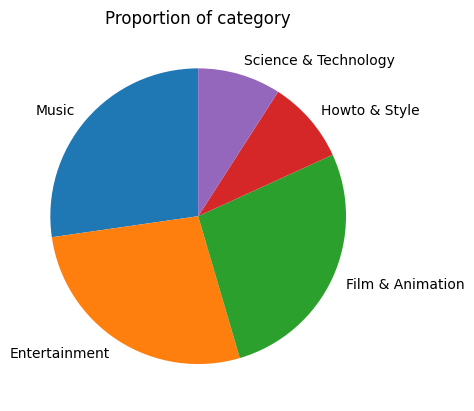

In [163]:
trending_duration['category'].value_counts().plot.pie(startangle=90)
plt.title(label='Proportion of category')
plt.ylabel(ylabel='')
plt.show()

## **Channels**

### **Question 7: What is the number of channels?**

In [165]:
us_videos['channel_title'].nunique()

2207

### **Question 8: Which channels feature the highest number of trending videos?**

In [169]:
us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False)

channel_title
ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
The Late Show with Stephen Colbert        58
                                          ..
nothorwitzer                               1
nickjonas                                  1
neilyoungchannel                           1
negermano                                  1
ARIKITCHEN (ìë¦¬í¤ì¹)                  1
Name: video_id, Length: 2207, dtype: int64

In [175]:
np.unique(ar=us_videos.groupby(by='channel_title')['video_id'].nunique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 34, 35, 36, 37, 40,
       46, 47, 52, 55, 58, 70, 72, 74, 84])

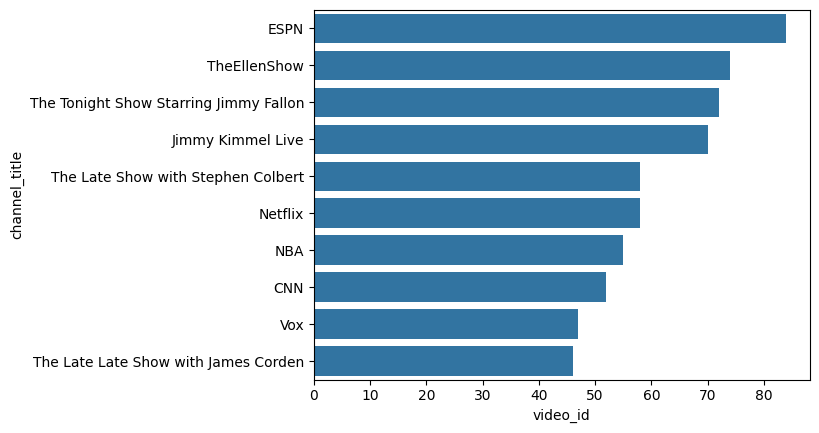

In [168]:
sns.barplot(data=us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False).head(n=10),
            orient='h')
plt.show()

### **Question 9: Which channels have the highest number of published categories?**

In [172]:
us_videos.groupby(by='channel_title')['category'].nunique().sort_values(ascending=False)

channel_title
INSIDER                7
ViralHog               7
National Geographic    6
Teen Vogue             5
WIRED                  5
                      ..
ABC7                   1
AFP news agency        1
AIA awards             1
ALL URBAN CENTRAL      1
60 Minutes             1
Name: category, Length: 2207, dtype: int64

In [174]:
np.unique(ar=us_videos.groupby(by='channel_title')['category'].nunique())

array([1, 2, 3, 4, 5, 6, 7])

### **Question 10: Which channels receive the most average views, likes, dislikes, and comments?**

#### **Views**

In [193]:
us_videos.groupby(by=['channel_title', 'video_id'], as_index=False)['views'].max().groupby(by='channel_title')['views'].mean().sort_values(ascending=False).head(n=10)

channel_title
ChildishGambinoVEVO   225,211,923.00
BeckyGVEVO            139,334,502.00
TheWeekndVEVO         122,544,931.00
LuisFonsiVEVO         102,012,605.00
MalumaVEVO             73,570,842.00
DrakeVEVO              60,635,812.00
Kylie Jenner           56,111,957.00
Cardi B                55,897,560.00
Selena Gomez           54,863,912.00
ArianaGrandeVevo       50,911,589.67
Name: views, dtype: float64

In [204]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='channel_title')['views'].mean().sort_values(ascending=False).head(n=10)

channel_title
ChildishGambinoVEVO   225,211,923.00
BeckyGVEVO            139,334,502.00
TheWeekndVEVO         122,544,931.00
LuisFonsiVEVO         102,012,605.00
MalumaVEVO             73,570,842.00
DrakeVEVO              60,635,812.00
Kylie Jenner           56,111,957.00
Cardi B                55,897,560.00
Selena Gomez           54,863,912.00
ArianaGrandeVevo       50,911,589.67
Name: views, dtype: float64

#### **Likes**

In [205]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='channel_title')['likes'].mean().sort_values(ascending=False).head(n=10)

channel_title
ChildishGambinoVEVO   5,023,450.00
ibighit               2,438,628.22
LuisFonsiVEVO         2,376,636.00
David Dobrik          2,032,463.00
TheWeekndVEVO         1,427,436.00
BeckyGVEVO            1,425,496.00
Logan Paul Vlogs      1,405,268.75
Desimpedidos          1,121,217.00
Cardi B               1,098,608.50
ArianaGrandeVevo      1,097,980.33
Name: likes, dtype: float64

#### **Dislikes**

In [230]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='channel_title')['dislikes'].mean().sort_values(ascending=False).head(n=10)

channel_title
Logan Paul Vlogs      651,109.50
YouTube Spotlight     590,677.33
ChildishGambinoVEVO   343,541.00
Daily Caller          228,426.00
shakiraVEVO           124,281.00
Call of Duty          122,546.50
BeckyGVEVO            119,798.00
LuisFonsiVEVO         117,196.00
Erika Costell         104,831.00
David Dobrik          101,678.00
Name: dislikes, dtype: float64

#### **Comments**

In [231]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='channel_title')['comment_count'].mean().sort_values(ascending=False).head(n=10)

channel_title
Logan Paul Vlogs      658,084.25
ChildishGambinoVEVO   517,232.00
ibighit               377,834.00
David Dobrik          320,194.00
YouTube Spotlight     302,081.33
The ACE Family        193,355.00
Collins Key           157,166.00
TheAngryGrandpaShow   137,276.50
LuisFonsiVEVO         134,224.00
jypentertainment      104,597.00
Name: comment_count, dtype: float64

### **Question 11: Which channels have the best average ratio of likes to dislikes?**

In [237]:
likes_to_dislikes = us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date'])
likes_to_dislikes['likes_to_dislikes'] = likes_to_dislikes['likes'] / (likes_to_dislikes['dislikes'] + 1)
likes_to_dislikes.groupby(by='channel_title')['likes_to_dislikes'].mean().sort_values(ascending=False).head(n=10)

channel_title
Smyang Piano              1,195.00
Amber Liu                   602.80
KickThePj                   565.26
Duan Mackenzie              498.07
TheVampsVEVO                371.04
Conan Gray                  369.04
Kingsley                    362.43
DanAndPhilGAMES             317.17
ShibSibs                    311.60
Alex French Guy Cooking     294.30
Name: likes_to_dislikes, dtype: float64

## **Seasonality**

### **Question 12: Which months or quarters see the highest number of published videos?**

In [18]:
us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique()

publish_time
1     1269
2      995
3      688
4      537
5      541
6      147
7        4
8        6
9       10
10      17
11     972
12    1167
Name: video_id, dtype: int64

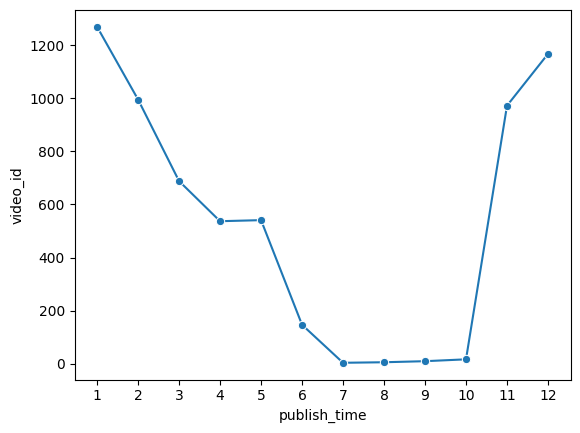

In [19]:
sns.lineplot(data=us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique(), marker='o')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

In [20]:
us_videos.groupby(by=us_videos['publish_time'].dt.quarter)['video_id'].nunique()

publish_time
1    2952
2    1224
3      20
4    2156
Name: video_id, dtype: int64

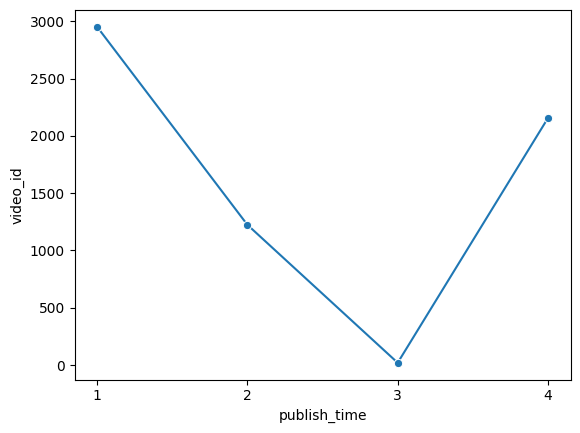

In [21]:
sns.lineplot(data=us_videos.groupby(by=us_videos['publish_time'].dt.quarter)['video_id'].nunique(), marker='o')
plt.xticks(ticks=range(1, 5), labels=range(1, 5))
plt.show()

### **Question 13: Which months see the highest number of trending videos?**

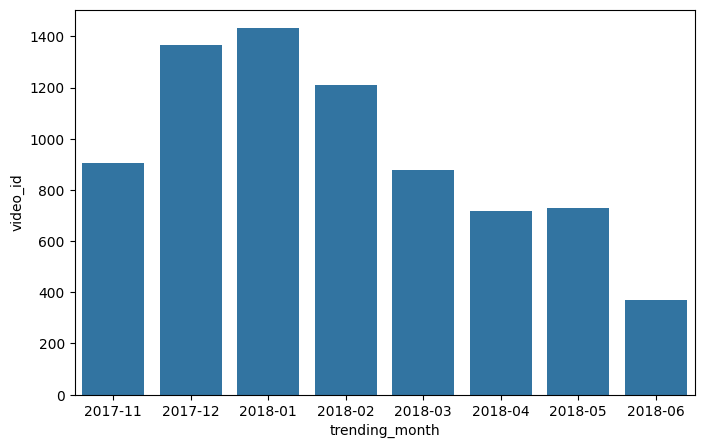

In [256]:
trending_by_time = us_videos.loc[:, ['video_id', 'trending_date']]
trending_by_time['trending_month'] = trending_by_time['trending_date'].astype(str).str[:7]
trending_by_time.drop(columns='trending_date', inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=trending_by_time.groupby(by='trending_month')['video_id'].nunique())
plt.show()

## **Title**

### **Question 14: How many videos have titles that are capitalized or non-capitalized?**

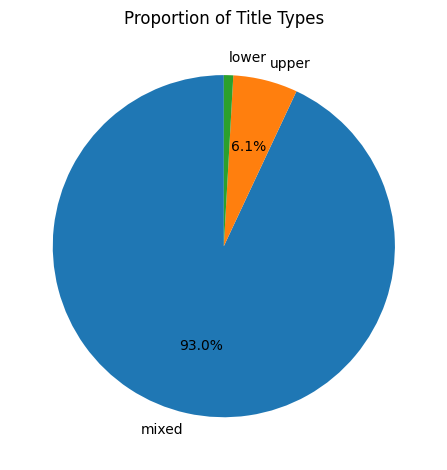

In [289]:
title_types = us_videos.loc[:, ['video_id', 'title']]
title_types['type'] = np.where(
    title_types['title'] == title_types['title'].str.upper(), 'upper', np.where(
        title_types['title'] == title_types['title'].str.lower(), 'lower', 'mixed'
    )
)

def autopct_func_1(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

title_types['type'].value_counts().plot.pie(startangle=90, autopct=autopct_func_1)
plt.title(label='Proportion of Title Types')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

### **Question 15: What is the length of videos' title?**

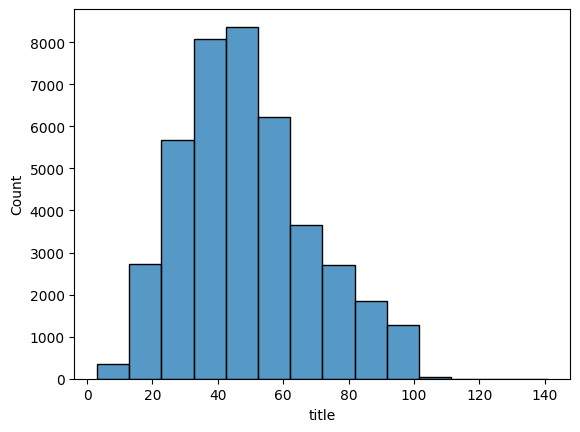

In [23]:
sns.histplot(data=us_videos['title'].str.len(), binwidth=10)
plt.show()

### **Question 16: How many videos share the same title?**

In [259]:
us_videos.groupby(by='title')['video_id'].nunique().sort_values(ascending=False)

title
DORITOS BLAZE vs. MTN DEW ICE | Super Bowl Commercial with Peter Dinklage and Morgan Freeman    2
Justice League - Movie Review                                                                   2
Maroon 5 - Wait                                                                                 2
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                    2
Missouri Star Quilt Company Live Stream                                                         2
                                                                                               ..
íë§ì¿ í¹â¥ ë¹ê¸ë¹ê¸ íì¤ë¦¬ì ¤ë¦¬ ë§ë¤ê¸°! - Ari Kitchen(ìë¦¬í¤ì¹)             1
ð april favs ð (music, clothes, life)                                                     1
ð«ë¬ì½¤ ìì¬ë¦~ ë¦¬ì¼ ì´ì½ë¦¿ ì°ì  ë§ë¤ê¸° Real Chocolate Milk | íì¸            1
ð How to make Pumpkin Pie Mistakes                                                           1
#23 Feed The H

In [262]:
temp = us_videos.groupby(by='title')['video_id'].nunique().sort_values(ascending=False)
temp[temp == 2]

title
DORITOS BLAZE vs. MTN DEW ICE | Super Bowl Commercial with Peter Dinklage and Morgan Freeman    2
Justice League - Movie Review                                                                   2
Maroon 5 - Wait                                                                                 2
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                    2
Missouri Star Quilt Company Live Stream                                                         2
NBA Bloopers - The Starters                                                                     2
Selena Gomez, Marshmello - Wolves                                                               2
Sia - Ho Ho Ho                                                                                  2
Name: video_id, dtype: int64

## **Categories**

### **Question 17: What categories are the most common?**

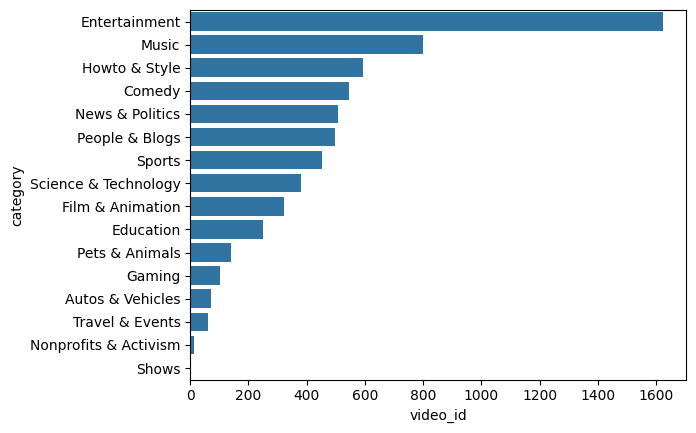

In [24]:
sns.barplot(data=us_videos.groupby(by='category')['video_id'].nunique().sort_values(ascending=False), orient='h')
plt.show()

### **Question 18: What categories receive the most average views, likes, dislikes, and comments?**

#### **Views**

In [292]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['video_id'].nunique().sort_values(ascending=False)

category
Entertainment            1621
Music                     801
Howto & Style             594
Comedy                    544
News & Politics           504
People & Blogs            495
Sports                    449
Science & Technology      381
Film & Animation          320
Education                 251
Pets & Animals            140
Gaming                    103
Autos & Vehicles           71
Travel & Events            59
Nonprofits & Activism      14
Shows                       4
Name: video_id, dtype: int64

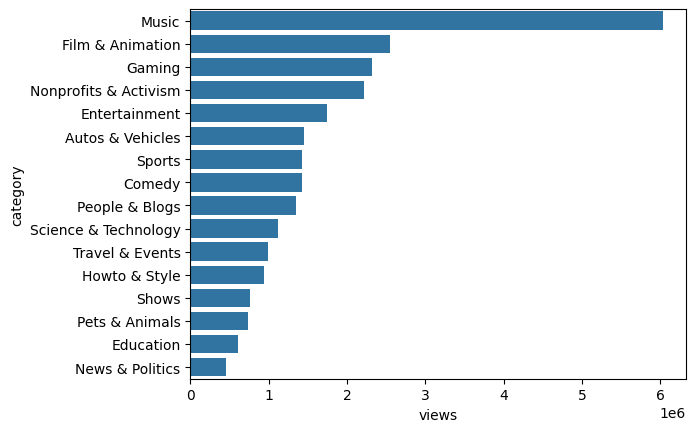

In [295]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['views'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Likes**

In [299]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['likes'].mean().sort_values(ascending=False)

category
Music                   188,067.01
Nonprofits & Activism   170,616.00
Gaming                   67,877.34
Comedy                   55,074.79
Film & Animation         52,123.81
People & Blogs           46,464.98
Entertainment            41,601.24
Howto & Style            34,758.22
Sports                   28,027.03
Science & Technology     26,682.41
Education                21,522.16
Pets & Animals           19,076.94
Shows                    15,435.25
Autos & Vehicles         10,286.00
Travel & Events           9,946.54
News & Politics           5,974.56
Name: likes, dtype: float64

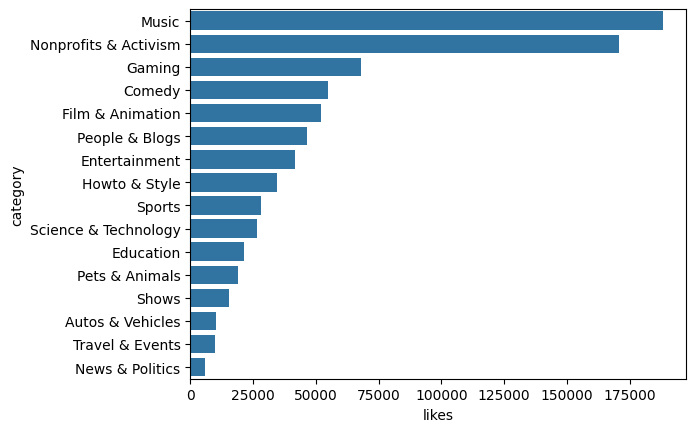

In [300]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['likes'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Dislikes**

In [301]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['dislikes'].mean().sort_values(ascending=False)

category
Nonprofits & Activism   40,233.00
Music                    6,572.41
Gaming                   6,067.88
Entertainment            4,152.06
People & Blogs           2,782.71
Film & Animation         2,143.93
Comedy                   1,962.33
Sports                   1,775.49
News & Politics          1,527.44
Science & Technology     1,438.29
Howto & Style            1,187.25
Education                  756.76
Travel & Events            666.20
Autos & Vehicles           653.48
Pets & Animals             484.99
Shows                      362.75
Name: dislikes, dtype: float64

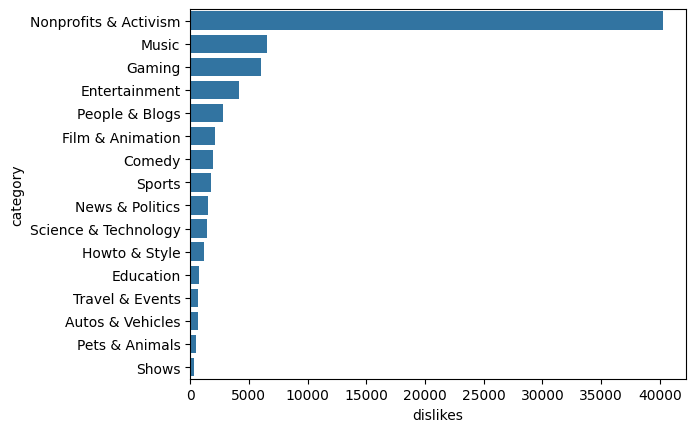

In [303]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['dislikes'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Comments**

In [302]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['comment_count'].mean().sort_values(ascending=False)

category
Nonprofits & Activism   52,888.00
Music                   16,061.28
Gaming                  13,463.27
People & Blogs           6,167.60
Film & Animation         6,110.94
Entertainment            6,106.79
Comedy                   5,489.94
Howto & Style            4,872.75
Science & Technology     3,651.22
Sports                   3,318.36
Pets & Animals           2,566.46
Education                2,526.28
News & Politics          2,139.66
Travel & Events          1,790.78
Autos & Vehicles         1,737.28
Shows                    1,521.25
Name: comment_count, dtype: float64

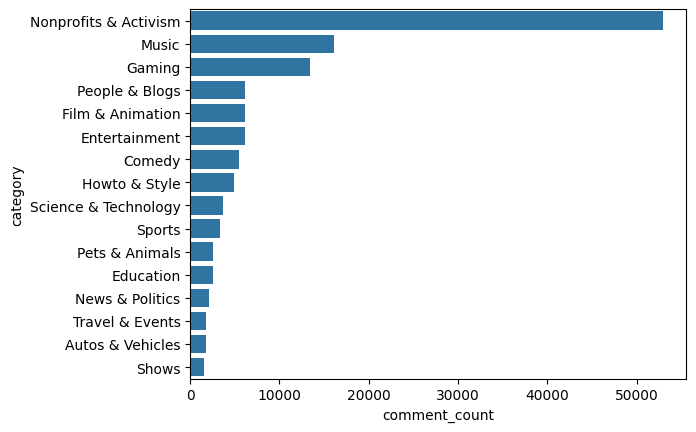

In [304]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['comment_count'].mean().sort_values(ascending=False), orient='h')
plt.show()

## **Tags**

### **Question 19: What tags are the most common?**

In [348]:
tags_dict = Counter([tag.replace('"', '') for tags in us_videos['tags'].str.split('|') for tag in tags if tag != '[none]'])
common_tags = tags_dict.most_common(10)
common_tags

[('funny', 3597),
 ('comedy', 2927),
 ('how to', 1602),
 ('music', 1298),
 ('Pop', 1278),
 ('2018', 1270),
 ('humor', 1184),
 ('food', 1159),
 ('science', 1111),
 ('review', 1004)]

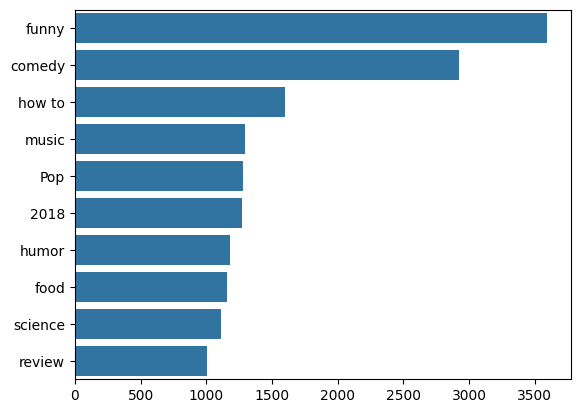

In [349]:
sns.barplot(x=[tag[1] for tag in common_tags], y=[tag[0] for tag in common_tags], orient='h')
plt.show()

### **Question 20: What tags receive the most average views, likes, dislikes, and comments?**

#### **Views**

In [373]:
tags_view = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_view[tag].append(us_videos.loc[i, 'views'])

for tag in tags_view.keys():
    tags_view[tag] = np.mean(a=tags_view[tag])

tags_view = sorted(tags_view.items(), key=lambda x: x[1], reverse=True)
top_tags_view = tags_view[:10]
bot_tags_view = tags_view[::-1][:10]

In [374]:
top_tags_view

[('This Is America', np.float64(150339550.6)),
 ('mcDJ Recording/RCA Records', np.float64(150339550.6)),
 ('Rewind 2017', np.float64(97600130.0)),
 ('#YouTubeRewind', np.float64(97600130.0)),
 ('Rewind 2016', np.float64(97600130.0)),
 ('HolaSoyGerman', np.float64(97600130.0)),
 ('Lilly Singh', np.float64(97600130.0)),
 ('Markiplier', np.float64(97600130.0)),
 ('Swoozie', np.float64(97600130.0)),
 ('Rhett Link', np.float64(97600130.0))]

In [375]:
bot_tags_view

[('governor matt bevin', np.float64(554.0)),
 ('fatality', np.float64(554.0)),
 ('marshall county high school', np.float64(554.0)),
 ('u.s. news', np.float64(554.0)),
 ('kentucky', np.float64(554.0)),
 ('NIKE', np.float64(695.5)),
 ('Autzen Stadium', np.float64(695.5)),
 ('Hayward Field', np.float64(695.5)),
 ('Track & Field', np.float64(695.5)),
 ('Tracktown USA', np.float64(695.5))]

#### **Likes**

In [376]:
tags_like = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_like[tag].append(us_videos.loc[i, 'likes'])

for tag in tags_like.keys():
    tags_like[tag] = np.mean(a=tags_like[tag])

tags_like = sorted(tags_like.items(), key=lambda x: x[1], reverse=True)
top_tags_like = tags_like[:10]
bot_tags_like = tags_like[::-1][:10]

In [377]:
top_tags_like

[('FAKE_LOVE', np.float64(5227306.076923077)),
 ('This Is America', np.float64(3868032.72)),
 ('mcDJ Recording/RCA Records', np.float64(3868032.72)),
 ('FAKE LOVE', np.float64(3483758.5)),
 ('fake love', np.float64(3323154.0434782607)),
 ('BIGHIT', np.float64(2490589.0125)),
 ('Rewind 2017', np.float64(2472671.5)),
 ('#YouTubeRewind', np.float64(2472671.5)),
 ('Rewind 2016', np.float64(2472671.5)),
 ('HolaSoyGerman', np.float64(2472671.5))]

In [378]:
bot_tags_like

[('CONCEALER KIT', np.float64(0.0)),
 ('KKW BEAUTY', np.float64(0.0)),
 ('Mario Dedivanovic', np.float64(0.0)),
 ('after movie', np.float64(0.0)),
 ('relive', np.float64(0.0)),
 ('umf', np.float64(0.0)),
 ('ultra music festival', np.float64(0.0)),
 ('raft', np.float64(0.0)),
 ('ITF', np.float64(0.0)),
 ('Indonesian Through Flow', np.float64(0.0))]

#### **Dislikes**

In [379]:
tags_dislike = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_dislike[tag].append(us_videos.loc[i, 'dislikes'])

for tag in tags_dislike.keys():
    tags_dislike[tag] = np.mean(a=tags_dislike[tag])

tags_dislike = sorted(tags_dislike.items(), key=lambda x: x[1], reverse=True)
top_tags_dislike = tags_dislike[:10]
bot_tags_dislike = tags_dislike[::-1][:10]

In [380]:
top_tags_dislike

[('logan paul apology', np.float64(1313219.857142857)),
 ('suicide forest', np.float64(1313219.857142857)),
 ('japanese suicide forest', np.float64(1313219.857142857)),
 ('suicide apology', np.float64(1313219.857142857)),
 ('Rewind 2017', np.float64(1263894.125)),
 ('#YouTubeRewind', np.float64(1263894.125)),
 ('Rewind 2016', np.float64(1263894.125)),
 ('HolaSoyGerman', np.float64(1263894.125)),
 ('Lilly Singh', np.float64(1263894.125)),
 ('Markiplier', np.float64(1263894.125))]

In [381]:
bot_tags_dislike

[('CONCEALER KIT', np.float64(0.0)),
 ('KKW BEAUTY', np.float64(0.0)),
 ('Mario Dedivanovic', np.float64(0.0)),
 ('after movie', np.float64(0.0)),
 ('relive', np.float64(0.0)),
 ('umf', np.float64(0.0)),
 ('ultra music festival', np.float64(0.0)),
 ('raft', np.float64(0.0)),
 ('ITF', np.float64(0.0)),
 ('Indonesian Through Flow', np.float64(0.0))]

#### **Comments**

In [383]:
tags_comment = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_comment[tag].append(us_videos.loc[i, 'comment_count'])

for tag in tags_comment.keys():
    tags_comment[tag] = np.mean(a=tags_comment[tag])

tags_comment = sorted(tags_comment.items(), key=lambda x: x[1], reverse=True)
top_tags_comment = tags_comment[:10]
bot_tags_comment = tags_comment[::-1][:10]

In [384]:
top_tags_comment

[('logan paul apology', np.float64(1170006.4285714286)),
 ('suicide forest', np.float64(1170006.4285714286)),
 ('japanese suicide forest', np.float64(1170006.4285714286)),
 ('suicide apology', np.float64(1170006.4285714286)),
 ('FAKE_LOVE', np.float64(1144327.3846153845)),
 ('Rewind 2017', np.float64(737316.125)),
 ('#YouTubeRewind', np.float64(737316.125)),
 ('Rewind 2016', np.float64(737316.125)),
 ('HolaSoyGerman', np.float64(737316.125)),
 ('Lilly Singh', np.float64(737316.125))]

In [385]:
bot_tags_comment

[('apple hyukoh', np.float64(0.0)),
 ('apple emojis', np.float64(0.0)),
 ('iphone x emojis', np.float64(0.0)),
 ('iphone emojis', np.float64(0.0)),
 ('iphone citizen kane', np.float64(0.0)),
 ('iphone hyukoh', np.float64(0.0)),
 ('chicken animoji', np.float64(0.0)),
 ('dragon animoji', np.float64(0.0)),
 ('bear animoji', np.float64(0.0)),
 ('citizen kane animoji', np.float64(0.0))]

## **Key factors for popularity**

### **Question 21: Which are the key factors that contribute to popularity?**